# <font color=blue>Olist Analysis</font> - Exploring Relationships
## Table of contents
Importing libraries and datasets

# Importing libraries and datasets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'C:\Users\PC\Downloads\Olist Analysis'

In [3]:
# Import datasets
df_items_rev = pd.read_csv(os.path.join(path,'Prepared Data', 'olist_items_reviews_items_dataset.csv'), index_col = False)

# Data Visualizations

In [4]:
# Checking data head
df_items_rev.head()

,Unnamed: 0,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [5]:
# Removing unnecessary columns
df_items_rev = df_items_rev.drop('Unnamed: 0', axis=1)
df_items_rev = df_items_rev.drop('review_id', axis=1)
df_items_rev = df_items_rev.drop('order_id', axis=1)
df_items_rev = df_items_rev.drop('review_comment_title', axis=1)
df_items_rev = df_items_rev.drop('review_comment_message', axis=1)
df_items_rev = df_items_rev.drop('review_creation_date', axis=1)
df_items_rev = df_items_rev.drop('review_answer_timestamp', axis=1)
df_items_rev = df_items_rev.drop('product_id', axis=1)
df_items_rev = df_items_rev.drop('seller_id', axis=1)
df_items_rev = df_items_rev.drop('shipping_limit_date', axis=1)

In [6]:
# Rechecking data head
df_items_rev.head()

,review_score,order_item_id,price,freight_value
0,4,1,185.00,13.63
1,4,2,185.00,13.63
2,5,1,79.79,8.30
3,5,1,149.00,45.12
4,5,1,179.99,42.85


In [7]:
# Creating a correlation matrix
df_items_rev.corr()

,review_score,order_item_id,price,freight_value
review_score,1.000000,-0.130890,-0.003941,-0.036179
order_item_id,-0.130890,1.000000,-0.061140,-0.029214
price,-0.003941,-0.061140,1.000000,0.412707
freight_value,-0.036179,-0.029214,0.412707,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

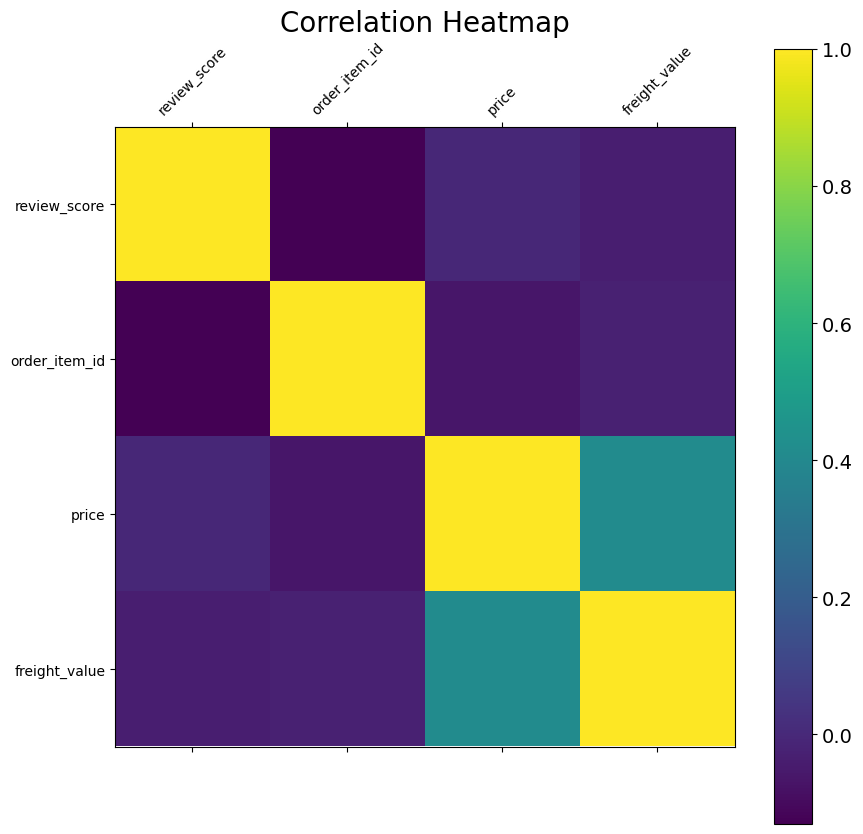

In [9]:
# Creating a correlation heatmap
f = plt.figure(figsize=(10, 10)) # Defining figure size 
plt.matshow(df_items_rev.corr(), fignum=f.number) # Type of plot
plt.xticks(range(df_items_rev.shape[1]), df_items_rev.columns, fontsize=10, rotation=45) # X axis label
plt.yticks(range(df_items_rev.shape[1]), df_items_rev.columns, fontsize=10) # Y axis label
cb = plt.colorbar() # Adding a colour legend
cb.ax.tick_params(labelsize=14) # Adding font size
plt.title('Correlation Heatmap', fontsize=20) # Adding title

The only correlation we see is between price and freight value. Everything else has a very weak negative correlation.

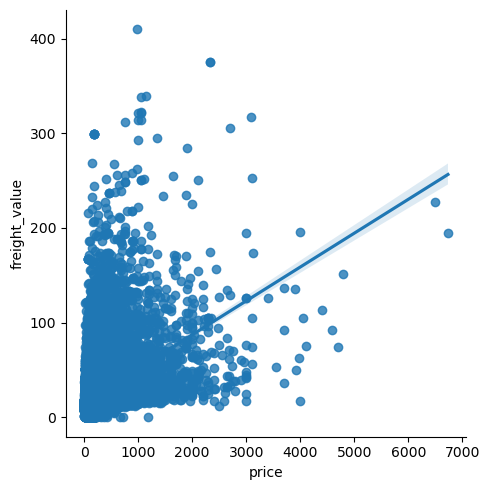

In [10]:
# Creating a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'price', y = 'freight_value', data = df_items_rev)

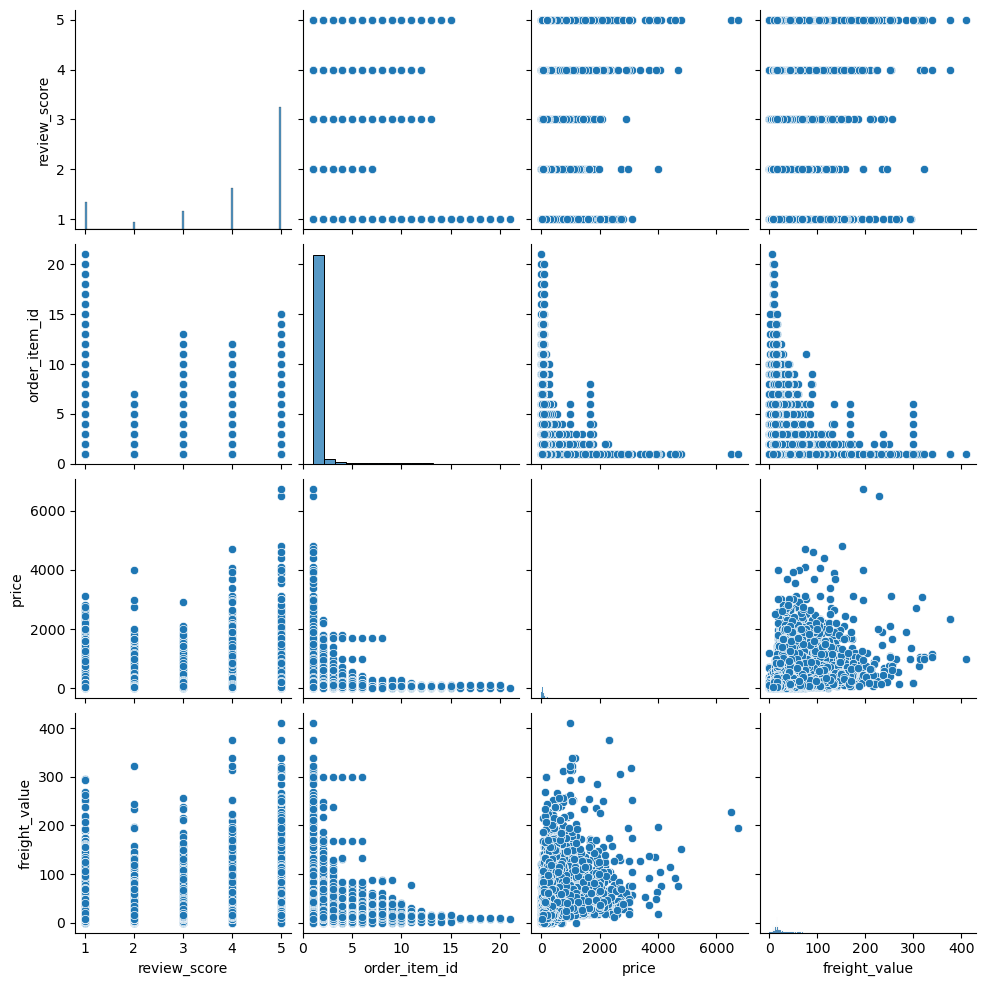

In [11]:
# Creating a pair plot 

g = sns.pairplot(df_items_rev)

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

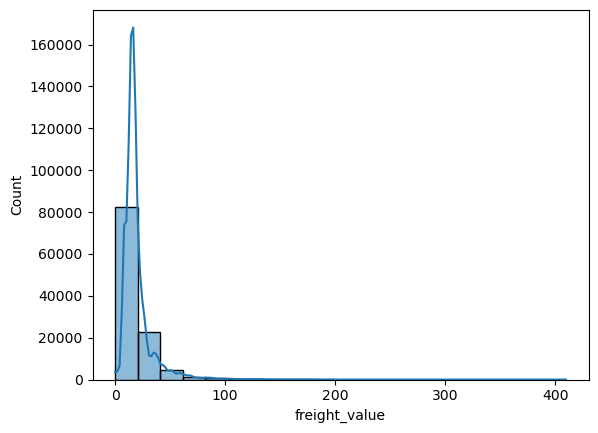

In [12]:
# Creating a freight_value histogram
sns.histplot(df_items_rev['freight_value'], bins = 20, kde = True)

<AxesSubplot:xlabel='price', ylabel='Count'>

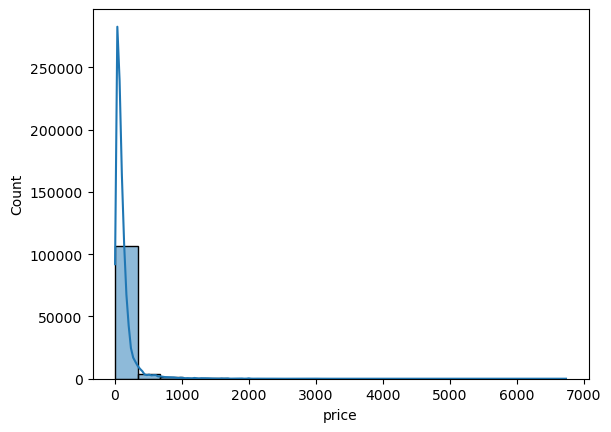

In [13]:
# Creating a price histogram
sns.histplot(df_items_rev['price'], bins = 20, kde = True)

In [24]:
# Creating price categories
df_items_rev.loc[df_items_rev['price'] < 100, 'Price category'] = 'Low price'
df_items_rev.loc[(df_items_rev['price'] >= 100) & (df_items_rev['price'] < 500), 'Price category'] = 'Middle price'
df_items_rev.loc[df_items_rev['price'] >= 500, 'Price category'] = 'High price'

In [25]:
# Checking price category value counts
df_items_rev['Price category'].value_counts(dropna = False)

Low price       72054
Middle price    37110
High price       3208
Name: Price category, dtype: int64

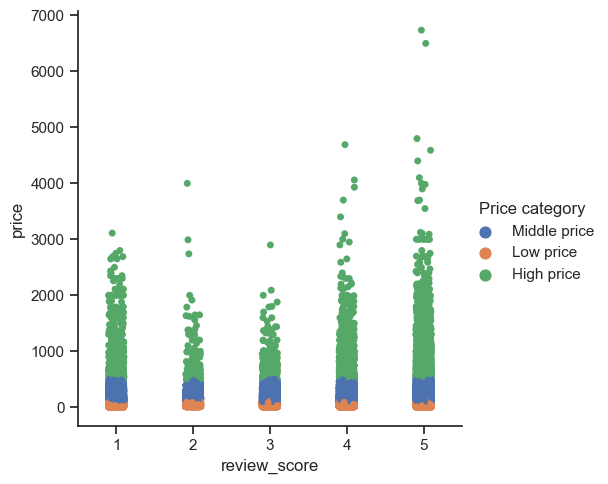

In [26]:
# Creating a categorical plot comparing prices to review scores.

sns.set(style="ticks")
g = sns.catplot(x="review_score", y="price", hue="Price category", data=df_items_rev)